In [16]:
import cv2
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Arabic Sign Language Dataset

## Class Distribution Summary

**Total Images**: 9,955  
**Number of Classes**: 32  
**Average per Class**: 311.1 ± 6.6

## Balance Assessment
- **Max Class**: 315 images
- **Min Class**: 290 images (dal)
- **Range**: 25 images (8% difference)

## Training Suitability

### **Strengths**
- **Good baseline balance** (8% variance)
- **Adequate samples per class** (~300+)
- **Consistent distribution** across most classes

### **Considerations**
- **9,955 total images for 32 classes** = ~311 per class
- **May need data augmentation** for robust performance

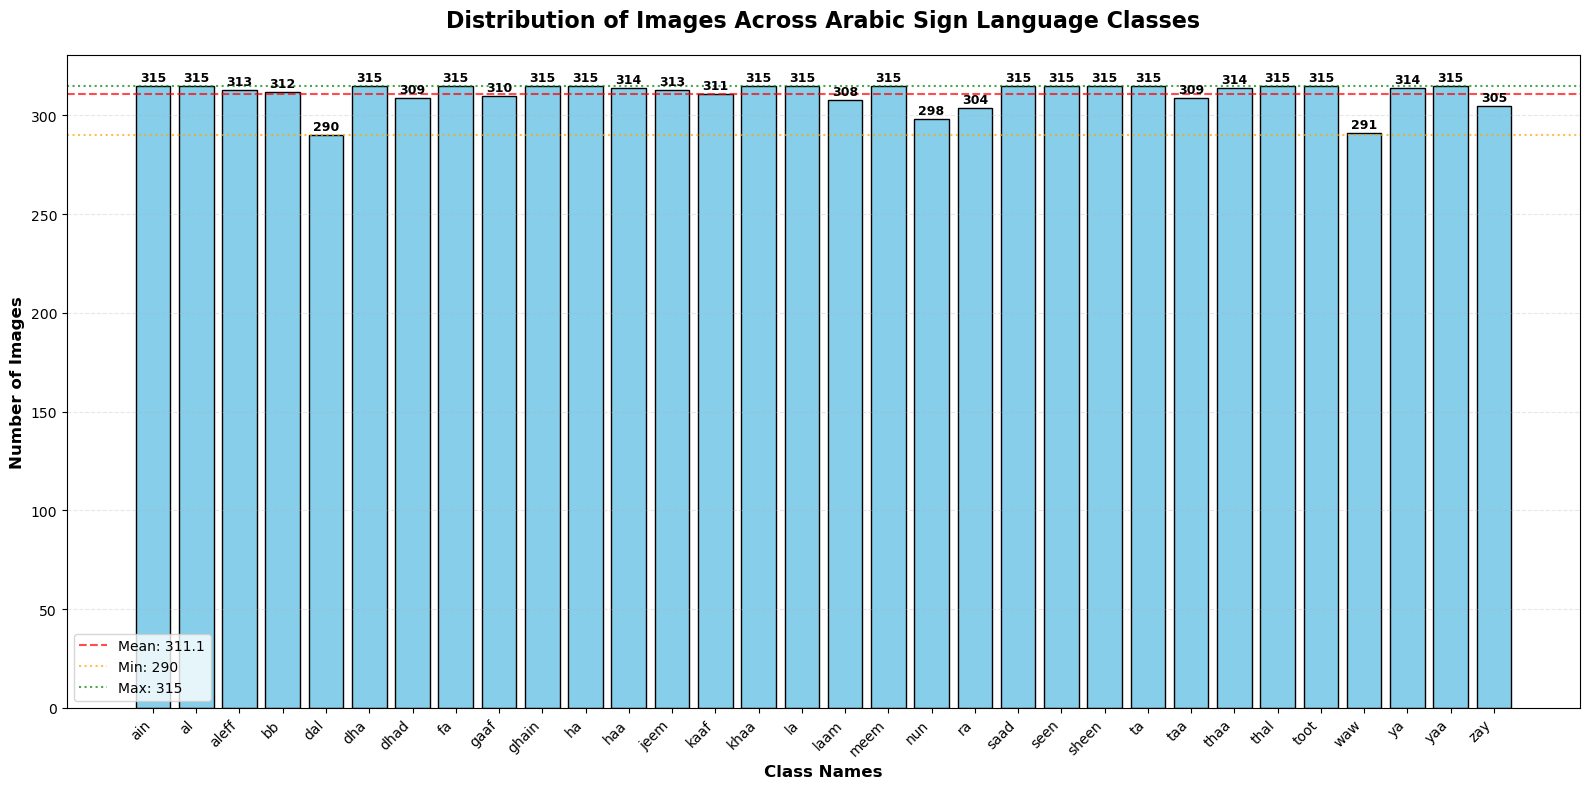

=== DATASET STATISTICS ===
Total images: 9955
Number of classes: 32
Average images per class: 311.1
Minimum images in a class: 290 (dal)
Maximum images in a class: 315
Standard deviation: 6.6
Classes with minimum images (290):
  - dal

Classes below average (<311.1):
  - dal: 290 images
  - dhad: 309 images
  - gaaf: 310 images
  - kaaf: 311 images
  - laam: 308 images
  - nun: 298 images
  - ra: 304 images
  - taa: 309 images
  - waw: 291 images
  - zay: 305 images


In [2]:
class_names = ['ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf', 'ghain', 
               'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 'laam', 'meem', 'nun', 'ra', 
               'saad', 'seen', 'sheen', 'ta', 'taa', 'thaa', 'thal', 'toot', 'waw', 'ya', 'yaa', 'zay']

image_counts = [315, 315, 313, 312, 290, 315, 309, 315, 310, 315, 
                315, 314, 313, 311, 315, 315, 308, 315, 298, 304, 
                315, 315, 315, 315, 309, 314, 315, 315, 291, 314, 315, 305]

# Create the histogram
plt.figure(figsize=(16, 8))
bars = plt.bar(class_names, image_counts, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Images Across Arabic Sign Language Classes', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Class Names', fontsize=12, fontweight='bold')
plt.ylabel('Number of Images', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on top of each bar
for bar, count in zip(bars, image_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             str(count), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add statistics
mean_count = np.mean(image_counts)
min_count = min(image_counts)
max_count = max(image_counts)
std_dev = np.std(image_counts)

plt.axhline(y=mean_count, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_count:.1f}')
plt.axhline(y=min_count, color='orange', linestyle=':', alpha=0.7, label=f'Min: {min_count}')
plt.axhline(y=max_count, color='green', linestyle=':', alpha=0.7, label=f'Max: {max_count}')

# Add legend
plt.legend()

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print statistics
print(f"=== DATASET STATISTICS ===")
print(f"Total images: {sum(image_counts)}")
print(f"Number of classes: {len(class_names)}")
print(f"Average images per class: {mean_count:.1f}")
print(f"Minimum images in a class: {min_count} ({class_names[image_counts.index(min_count)]})")
print(f"Maximum images in a class: {max_count}")
print(f"Standard deviation: {std_dev:.1f}")
print(f"Classes with minimum images ({min_count}):")
for i, (cls, count) in enumerate(zip(class_names, image_counts)):
    if count == min_count:
        print(f"  - {cls}")

print(f"\nClasses below average (<{mean_count:.1f}):")
below_avg = [(cls, count) for cls, count in zip(class_names, image_counts) if count < mean_count]
for cls, count in below_avg:
    print(f"  - {cls}: {count} images")

# Arabic Sign Language Dataset

## Validation Set Summary

**Total Images**: 2,123  
**Number of Classes**: 32  
**Average per Class**: 66.3 ± 2.7

## Validation Balance
- **Max Class**: 69 images (thaa)
- **Min Class**: 56 images (dal)
- **Range**: 13 images (20% difference)

## Dataset Quality Assessment

### **Strengths**
- **Good baseline balance** in both sets (8-20% variance)
- **Uniform distribution** across all 32 classes

### **Considerations**
- **Validation set smaller** (~66 samples/class)
- **7 classes below average** in validation set
- **May need stratified augmentation** for low-count classes

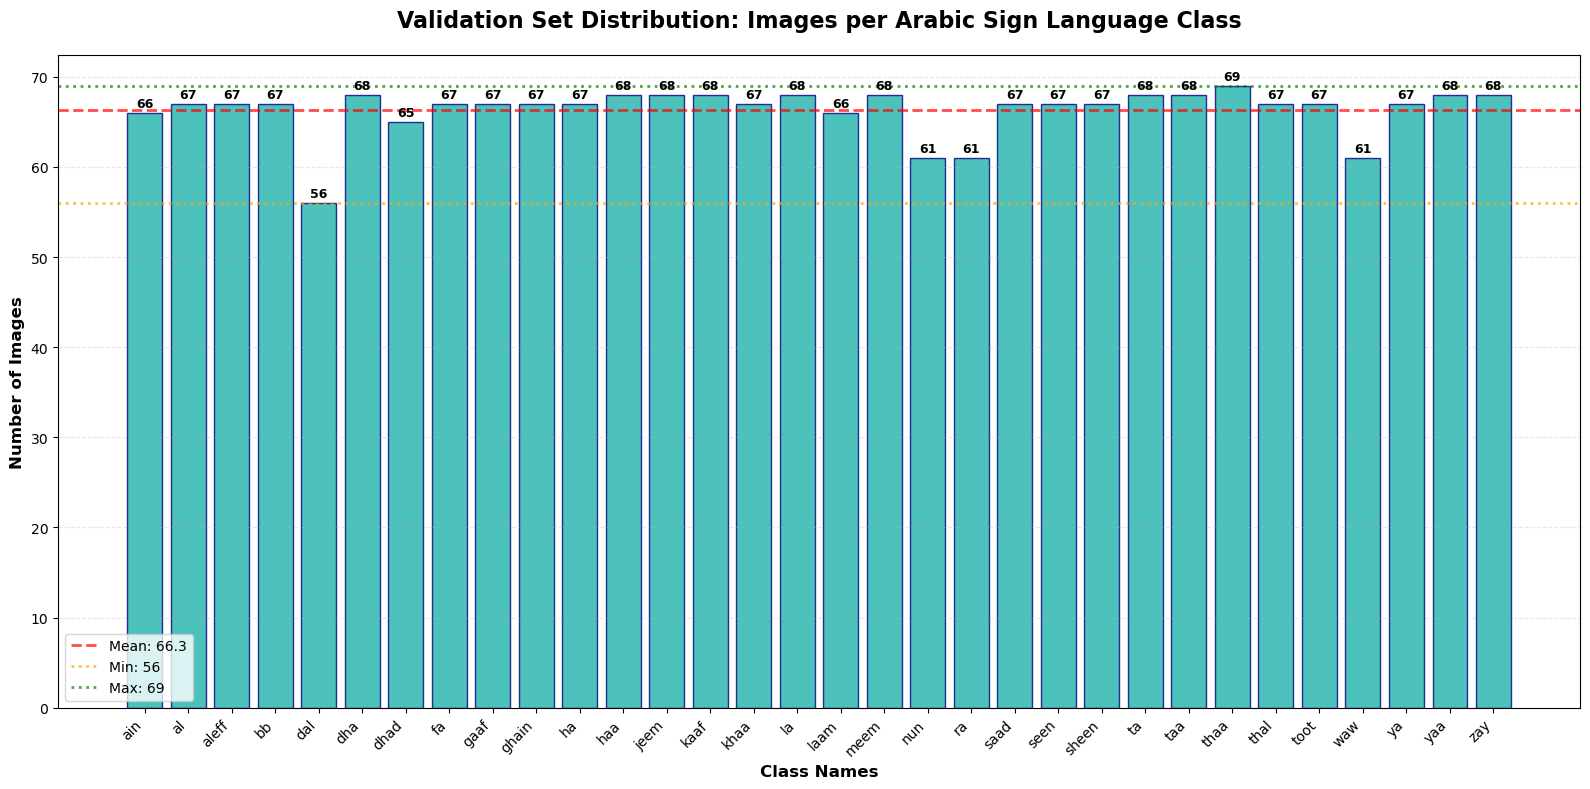

=== VALIDATION SET STATISTICS ===
Total validation images: 2123
Number of classes: 32
Average images per class: 66.3
Minimum images in a class: 56
Maximum images in a class: 69
Standard deviation: 2.7

Classes with minimum images (56):
  - dal

Classes with maximum images (69):
  - thaa

Classes below average (<66.3):
  - ain: 66 images
  - dal: 56 images
  - dhad: 65 images
  - laam: 66 images
  - nun: 61 images
  - ra: 61 images
  - waw: 61 images


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Your validation set data
class_names = ['ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf', 'ghain', 
               'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 'laam', 'meem', 'nun', 'ra', 
               'saad', 'seen', 'sheen', 'ta', 'taa', 'thaa', 'thal', 'toot', 'waw', 'ya', 'yaa', 'zay']

val_counts = [66, 67, 67, 67, 56, 68, 65, 67, 67, 67, 
              67, 68, 68, 68, 67, 68, 66, 68, 61, 61, 
              67, 67, 67, 68, 68, 69, 67, 67, 61, 67, 68, 68]

# Create the histogram
plt.figure(figsize=(16, 8))
bars = plt.bar(class_names, val_counts, color='lightseagreen', edgecolor='navy', alpha=0.8)

# Customize the plot
plt.title('Validation Set Distribution: Images per Arabic Sign Language Class', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Class Names', fontsize=12, fontweight='bold')
plt.ylabel('Number of Images', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on top of each bar
for bar, count in zip(bars, val_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             str(count), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add statistics lines
mean_count = np.mean(val_counts)
min_count = min(val_counts)
max_count = max(val_counts)

plt.axhline(y=mean_count, color='red', linestyle='--', alpha=0.7, linewidth=2, label=f'Mean: {mean_count:.1f}')
plt.axhline(y=min_count, color='orange', linestyle=':', alpha=0.7, linewidth=2, label=f'Min: {min_count}')
plt.axhline(y=max_count, color='green', linestyle=':', alpha=0.7, linewidth=2, label=f'Max: {max_count}')

# Add legend
plt.legend()

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print statistics
print(f"=== VALIDATION SET STATISTICS ===")
print(f"Total validation images: {sum(val_counts)}")
print(f"Number of classes: {len(class_names)}")
print(f"Average images per class: {mean_count:.1f}")
print(f"Minimum images in a class: {min_count}")
print(f"Maximum images in a class: {max_count}")
print(f"Standard deviation: {np.std(val_counts):.1f}")

# Find which classes have min and max counts
min_classes = [class_names[i] for i, count in enumerate(val_counts) if count == min_count]
max_classes = [class_names[i] for i, count in enumerate(val_counts) if count == max_count]

print(f"\nClasses with minimum images ({min_count}):")
for cls in min_classes:
    print(f"  - {cls}")

print(f"\nClasses with maximum images ({max_count}):")
for cls in max_classes:
    print(f"  - {cls}")

print(f"\nClasses below average (<{mean_count:.1f}):")
below_avg = [(cls, count) for cls, count in zip(class_names, val_counts) if count < mean_count]
for cls, count in below_avg:
    print(f"  - {cls}: {count} images")

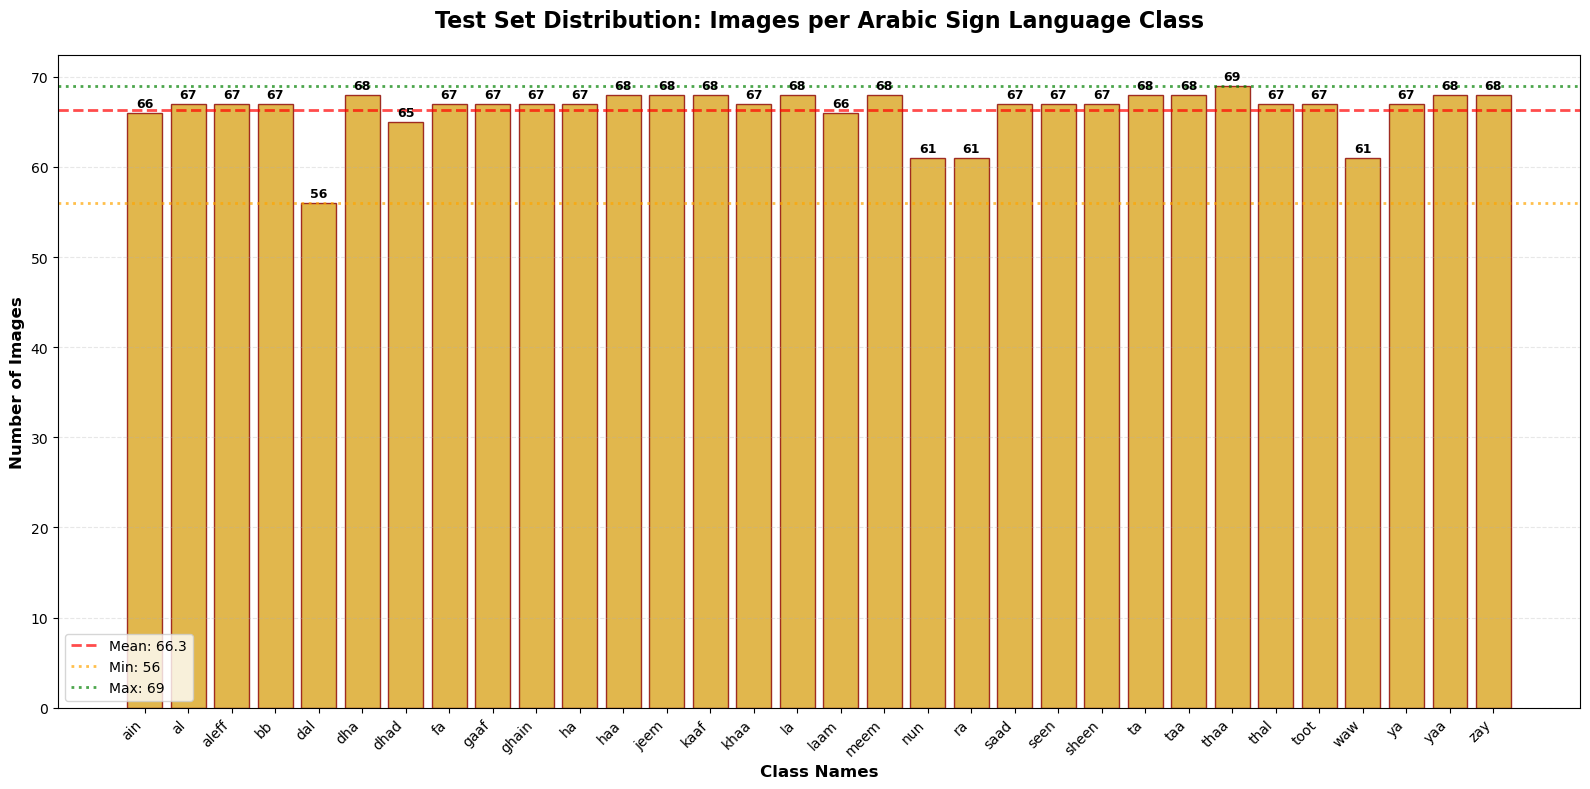

=== TEST SET STATISTICS ===
Total test images: 2123
Number of classes: 32
Average images per class: 66.3
Minimum images in a class: 56
Maximum images in a class: 69
Standard deviation: 2.7

Classes with minimum images (56):
  - dal

Classes with maximum images (69):
  - thaa

Classes below average (<66.3):
  - ain: 66 images
  - dal: 56 images
  - dhad: 65 images
  - laam: 66 images
  - nun: 61 images
  - ra: 61 images
  - waw: 61 images


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Your test set data
class_names = ['ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf', 'ghain', 
               'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 'laam', 'meem', 'nun', 'ra', 
               'saad', 'seen', 'sheen', 'ta', 'taa', 'thaa', 'thal', 'toot', 'waw', 'ya', 'yaa', 'zay']

test_counts = [66, 67, 67, 67, 56, 68, 65, 67, 67, 67, 
               67, 68, 68, 68, 67, 68, 66, 68, 61, 61, 
               67, 67, 67, 68, 68, 69, 67, 67, 61, 67, 68, 68]

# Create the histogram
plt.figure(figsize=(16, 8))
bars = plt.bar(class_names, test_counts, color='goldenrod', edgecolor='darkred', alpha=0.8)

# Customize the plot
plt.title('Test Set Distribution: Images per Arabic Sign Language Class', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Class Names', fontsize=12, fontweight='bold')
plt.ylabel('Number of Images', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on top of each bar
for bar, count in zip(bars, test_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             str(count), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add statistics lines
mean_count = np.mean(test_counts)
min_count = min(test_counts)
max_count = max(test_counts)

plt.axhline(y=mean_count, color='red', linestyle='--', alpha=0.7, linewidth=2, label=f'Mean: {mean_count:.1f}')
plt.axhline(y=min_count, color='orange', linestyle=':', alpha=0.7, linewidth=2, label=f'Min: {min_count}')
plt.axhline(y=max_count, color='green', linestyle=':', alpha=0.7, linewidth=2, label=f'Max: {max_count}')

# Add legend
plt.legend()

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print statistics
print(f"=== TEST SET STATISTICS ===")
print(f"Total test images: {sum(test_counts)}")
print(f"Number of classes: {len(class_names)}")
print(f"Average images per class: {mean_count:.1f}")
print(f"Minimum images in a class: {min_count}")
print(f"Maximum images in a class: {max_count}")
print(f"Standard deviation: {np.std(test_counts):.1f}")

# Find which classes have min and max counts
min_classes = [class_names[i] for i, count in enumerate(test_counts) if count == min_count]
max_classes = [class_names[i] for i, count in enumerate(test_counts) if count == max_count]

print(f"\nClasses with minimum images ({min_count}):")
for cls in min_classes:
    print(f"  - {cls}")

print(f"\nClasses with maximum images ({max_count}):")
for cls in max_classes:
    print(f"  - {cls}")

print(f"\nClasses below average (<{mean_count:.1f}):")
below_avg = [(cls, count) for cls, count in zip(class_names, test_counts) if count < mean_count]
for cls, count in below_avg:
    print(f"  - {cls}: {count} images")

In [5]:
def analyze_problematic_images(image_path):
    """
    Focus specifically on underexposed and low contrast images for sign detection
    """
    img = cv2.imread(image_path)
    if img is None:
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height, width = gray.shape
    
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist = hist.flatten()
    hist_norm = hist / hist.sum()
    
    mean_intensity = np.mean(gray)
    std_intensity = np.std(gray)  # Standard deviation for contrast measurement
    
    # Analyze pixel distribution
    very_dark = hist_norm[:64].sum()      # 0-63 (problematic for details)
    dark = hist_norm[64:128].sum()        # 64-127
    midtones = hist_norm[128:192].sum()   # 128-191
    bright = hist_norm[192:].sum()        # 192-255
    
    # Contrast metrics
    contrast_ratio = std_intensity / mean_intensity if mean_intensity > 0 else 0
    
    if mean_intensity < 60 and very_dark > 0.4:
        problem_status = "SEVERE_UNDEREXPOSED"
        severity = "HIGH"
    elif mean_intensity < 80 and very_dark > 0.3:
        problem_status = "UNDEREXPOSED"
        severity = "MEDIUM"
    elif std_intensity < 25:  # Very low contrast
        problem_status = "VERY_LOW_CONTRAST"
        severity = "HIGH"
    elif std_intensity < 40:  # Low contrast
        problem_status = "LOW_CONTRAST"
        severity = "MEDIUM"
    else:
        problem_status = "ACCEPTABLE"
        severity = "NONE"
    
    return {
        'filename': Path(image_path).name,
        'mean_intensity': mean_intensity,
        'std_intensity': std_intensity,
        'contrast_ratio': contrast_ratio,
        'very_dark_pixels': very_dark,
        'dark_pixels': dark,
        'midtones': midtones,
        'bright_pixels': bright,
        'problem_status': problem_status,
        'severity': severity,
        'image_size': f"{width}x{height}"
    }

In [6]:
def process_problematic_folder(folder_path):
    """
    Process folder and return only problematic images
    """
    folder_path = Path(folder_path)
    problematic_images = []
    acceptable_images = 0
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'}
    
    for img_file in folder_path.iterdir():
        if img_file.suffix.lower() in image_extensions:
            analysis = analyze_problematic_images(str(img_file))
            if analysis:
                if analysis['problem_status'] != "ACCEPTABLE":
                    problematic_images.append(analysis)
                else:
                    acceptable_images += 1
    
    return problematic_images, acceptable_images

In [7]:
def generate_problem_report(problematic_images, total_acceptable, output_file=None):
    """
    Generate focused report on problematic images
    """
    total_processed = len(problematic_images) + total_acceptable
    
    print("="*70)
    print("SIGN DETECTION IMAGE QUALITY REPORT")
    print("="*70)
    print(f"Total images processed: {total_processed}")
    print(f"Acceptable images: {total_acceptable} ({total_acceptable/total_processed*100:.1f}%)")
    print(f"Problematic images: {len(problematic_images)} ({len(problematic_images)/total_processed*100:.1f}%)")
    categories = {
        'SEVERE_UNDEREXPOSED': [],
        'UNDEREXPOSED': [],
        'VERY_LOW_CONTRAST': [],
        'LOW_CONTRAST': [],
    }
    
    for img in problematic_images:
        categories[img['problem_status']].append(img)
    
    print("\nProblem Breakdown:")
    print("-" * 40)
    for category, images in categories.items():
        if images:
            avg_brightness = np.mean([img['mean_intensity'] for img in images])
            print(f"{category:20s}: {len(images):3d} images (avg brightness: {avg_brightness:.1f})")
    
    return categories

In [8]:
def get_problematic_image_arrays(folder_path):
    """
    Simple function that returns only the category arrays
    """
    folder_path = Path(folder_path)
    
    category_arrays = {
        'SEVERE_UNDEREXPOSED': [],
        'UNDEREXPOSED': [],
        'VERY_LOW_CONTRAST': [],
        'LOW_CONTRAST': [],
    }
    
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'}
    
    for img_file in folder_path.iterdir():
        if img_file.suffix.lower() in image_extensions:
            analysis = analyze_problematic_images(str(img_file))
            if analysis and analysis['problem_status'] != "ACCEPTABLE":
                category = analysis['problem_status']
                if category in category_arrays:
                    category_arrays[category].append(analysis['filename'])
    
    return category_arrays

In [9]:
def visualize_problematic_examples(categories, max_examples=3):
    """
    Visualize examples of problematic images
    """
    print("\nVisualizing problematic examples:")
    
    for category, images in categories.items():
        if images and category != "ACCEPTABLE":
            examples = images[:max_examples]
            fig, axes = plt.subplots(2, len(examples), figsize=(15, 8))
            if len(examples) == 1:
                axes = axes.reshape(2, 1)
            
            fig.suptitle(f"{category} Examples", fontsize=16, fontweight='bold')
            
            for i, img_data in enumerate(examples):
                img_path = Path(folder_path) / img_data['filename']
                img = cv2.imread(str(img_path))
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                # Original image
                axes[0, i].imshow(img_rgb)
                axes[0, i].set_title(f"{img_data['filename']}\nMean: {img_data['mean_intensity']:.1f}")
                axes[0, i].axis('off')
                
                # Histogram
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                axes[1, i].hist(gray.ravel(), 256, [0, 256], color='gray', alpha=0.7)
                axes[1, i].set_xlim(0, 255)
                axes[1, i].set_xlabel('Pixel Intensity')
                axes[1, i].set_ylabel('Frequency')
                axes[1, i].axvline(img_data['mean_intensity'], color='red', linestyle='-', linewidth=2, label=f'Mean: {img_data["mean_intensity"]:.1f}')
                axes[1, i].legend()
                axes[1, i].set_title(f'Std: {img_data["std_intensity"]:.1f}')
            
            plt.tight_layout()
            plt.show()

# Sign Detection Image Quality Report

## Summary
- **Total Images**: 14,202
- **Acceptable**: 13,628 (96%)
- **Problematic**: 574 (4%)

##  Problem Types

###  Severe Underexposed (35 images)
- **Issue**: Extremely dark images
- **Avg Brightness**: 56.5/255
- **Impact**: Signs barely visible

### Underexposed (308 images)  
- **Issue**: Too dark for optimal detection
- **Avg Brightness**: 73.6/255
- **Impact**: Reduced sign clarity

### Very Low Contrast (1 image)
- **Issue**: Minimal brightness variation
- **Avg Brightness**: 151.1/255
- **Impact**: Hard to distinguish edges

### Low Contrast (230 images)
- **Issue**: Poor differentiation between colors
- **Avg Brightness**: 141.2/255
- **Impact**: Reduced feature detection

##  Overall Assessment
**Excellent dataset quality** - only 4% need correction

Analyzing images for sign detection suitability...
SIGN DETECTION IMAGE QUALITY REPORT
Total images processed: 14202
Acceptable images: 13628 (96.0%)
Problematic images: 574 (4.0%)

Problem Breakdown:
----------------------------------------
SEVERE_UNDEREXPOSED :  35 images (avg brightness: 56.5)
UNDEREXPOSED        : 308 images (avg brightness: 73.6)
VERY_LOW_CONTRAST   :   1 images (avg brightness: 151.1)
LOW_CONTRAST        : 230 images (avg brightness: 141.2)



Do you want to see visual examples of problematic images? (y/n):  y



Visualizing problematic examples:


C:\Users\Access\AppData\Local\Temp\ipykernel_6608\412750471.py:28: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1, i].hist(gray.ravel(), 256, [0, 256], color='gray', alpha=0.7)


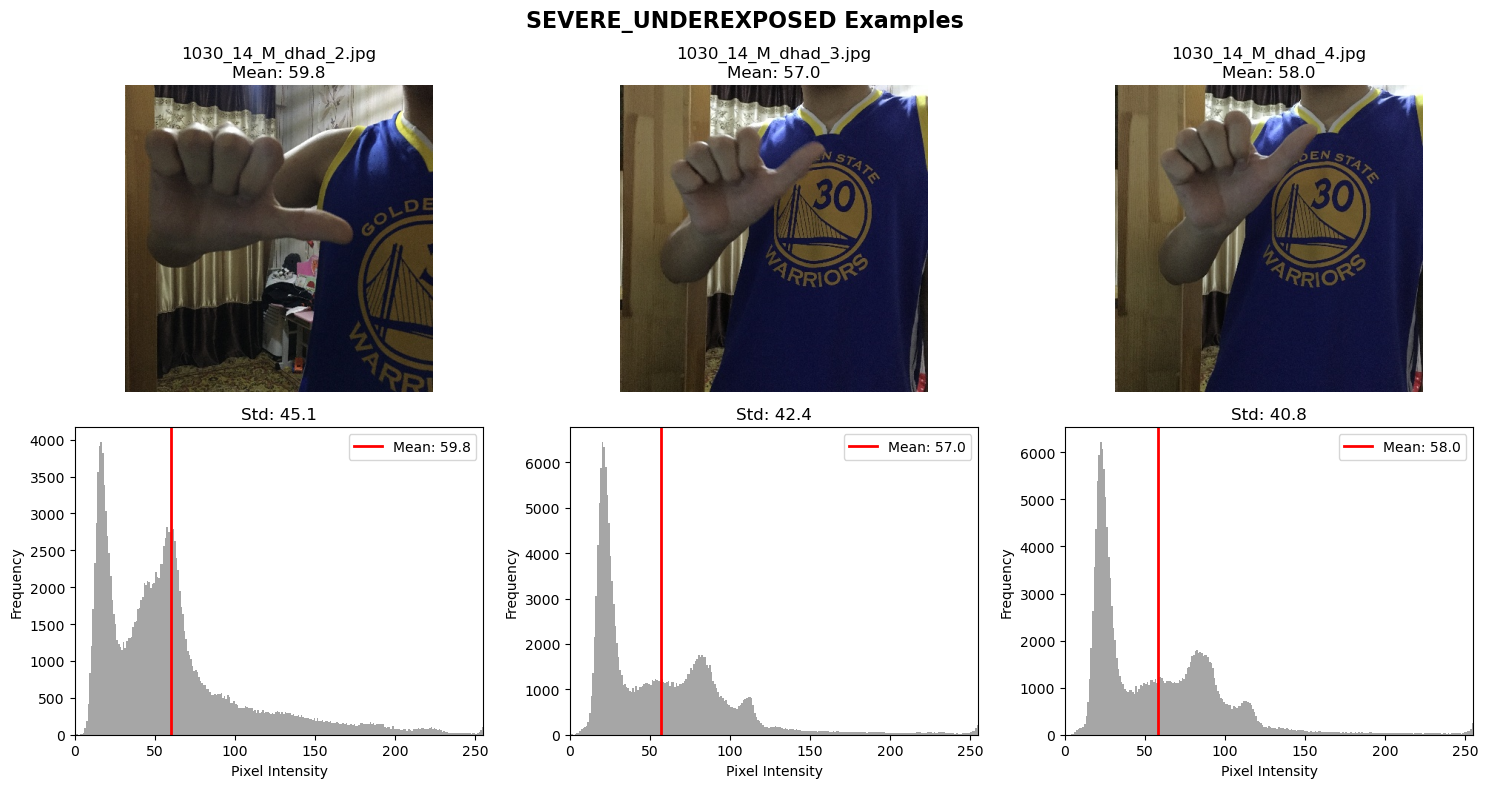

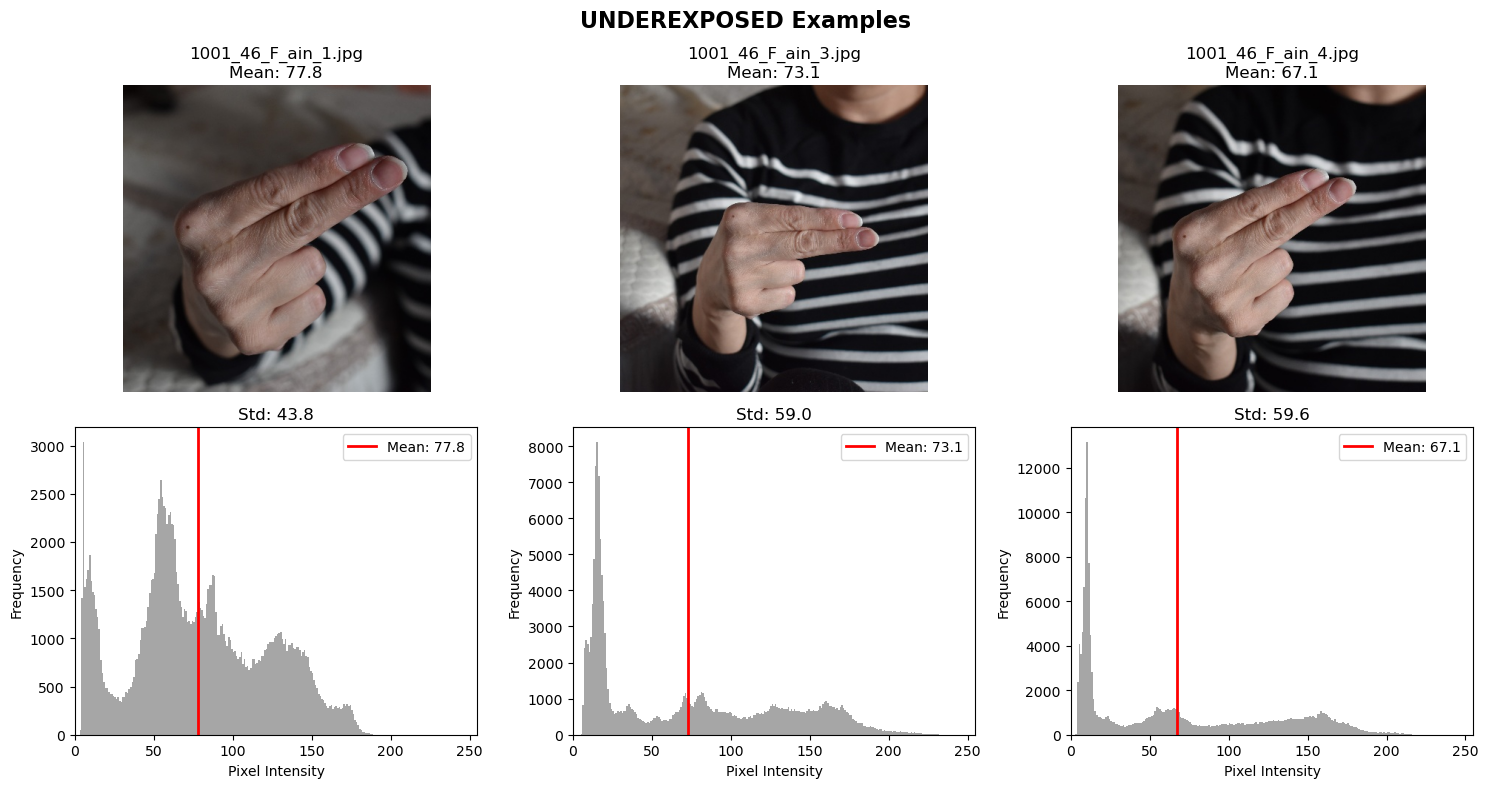

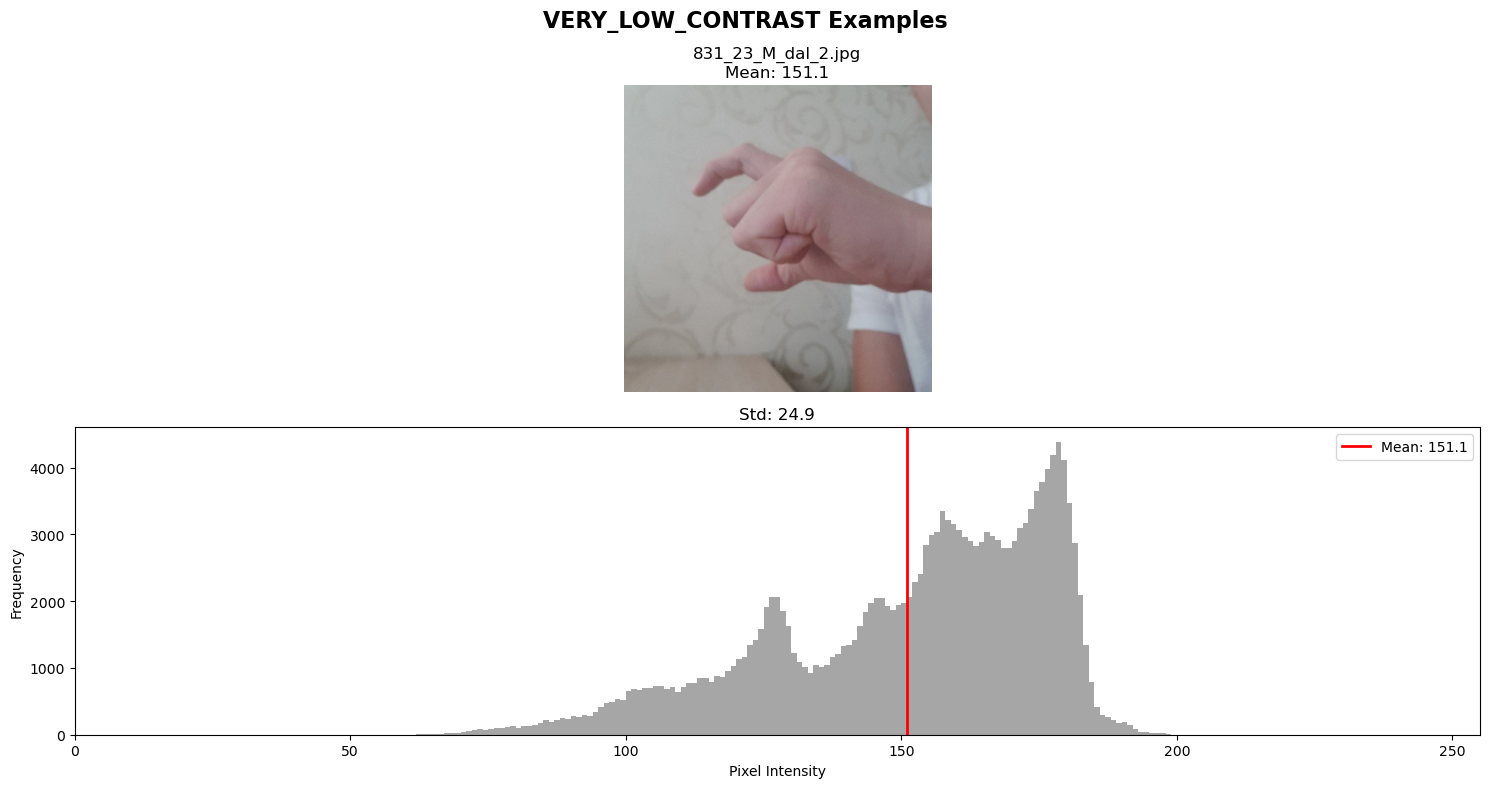

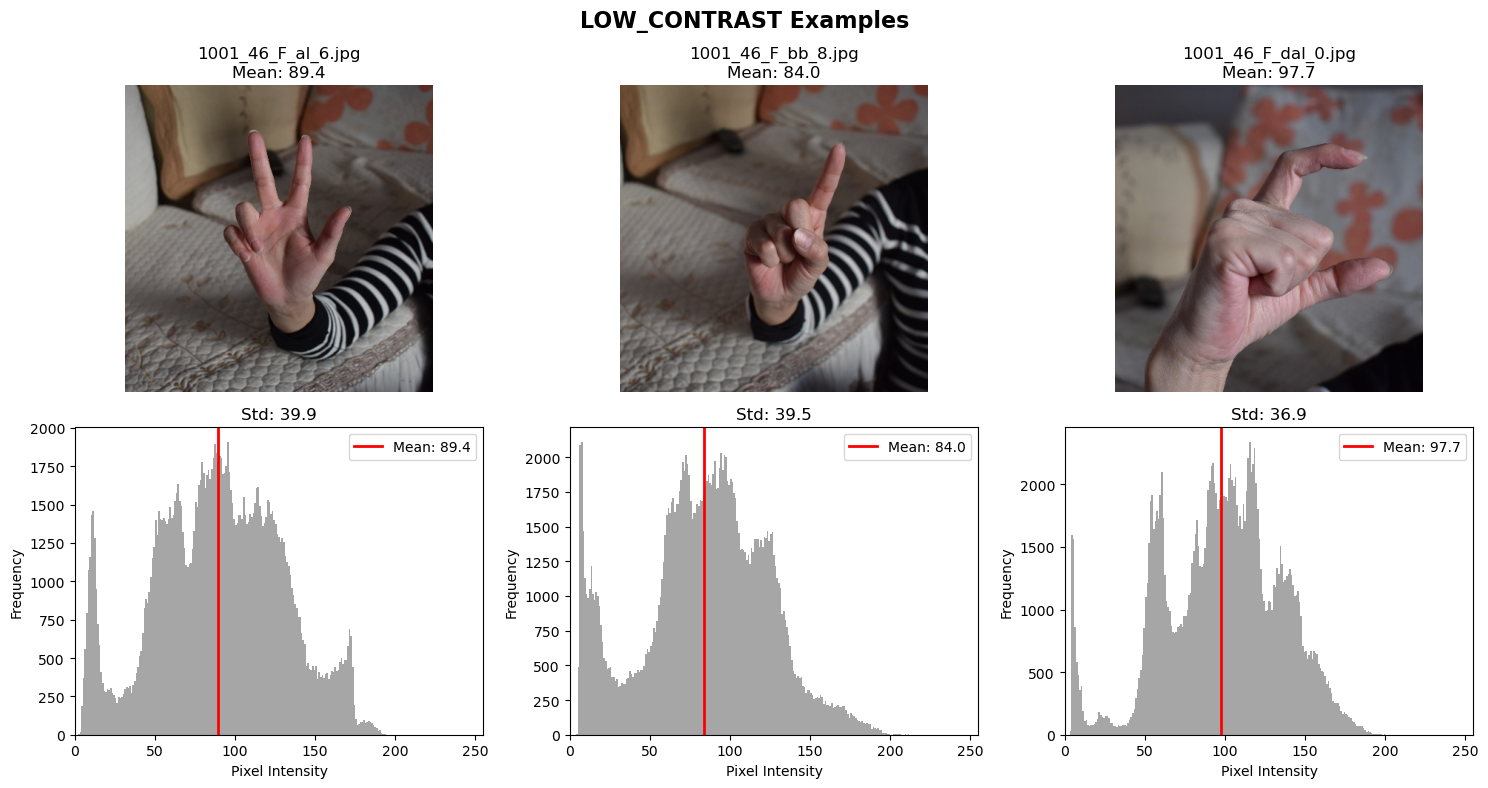

In [10]:
folder_path = r"C:\Users\Access\Documents\data\data\sign_data\images"
output_report = "sign_detection_problems.txt"
print("Analyzing images for sign detection suitability...")
problematic_images, acceptable_count = process_problematic_folder(folder_path)
if problematic_images:
    categories = generate_problem_report(problematic_images, acceptable_count, output_report)
    category_arrays = get_problematic_image_arrays(folder_path)
    response = input("\nDo you want to see visual examples of problematic images? (y/n): ")
    if response.lower() == 'y':
        visualize_problematic_examples(categories)

In [11]:
def detect_blur_laplacian(image_path, threshold=100):
    """
    Detect blur using Laplacian variance method
    Higher variance = sharper image, Lower variance = blurrier image
    """
    image = cv2.imread(str(image_path))
    if image is None:
        return None, 0, "UNREADABLE"
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate Laplacian variance
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    
    # Define blur classification ranges
    ranges = [
        (0, 50, "VERY_BLURRY"),
        (50, 100, "BLURRY"),
        (100, 150, "SLIGHTLY_BLURRY"),
        (150, float('inf'), "SHARP")
    ]
    # Classify blur level using ranges
    is_blurry = False
    blur_level = "UNKNOWN"
    
    for low, high, level in ranges:
        if low <= laplacian_var < high:
            blur_level = level
            is_blurry = level in ["VERY_BLURRY", "BLURRY", "SLIGHTLY_BLURRY"]
            break
    
    return is_blurry, laplacian_var, blur_level

In [12]:
def detailed_blur_analysis(folder_path):
    """
    Detailed analysis to understand the blur distribution better
    Returns both results list and organized arrays by blur level
    """
    folder_path = Path(folder_path)
    image_files = list(folder_path.glob("*.jpg")) + list(folder_path.glob("*.png")) + list(folder_path.glob("*.jpeg"))
    print(f"Detailed blur analysis on {len(image_files)} images...")
    
    results = []
    variance_values = []

    blur_arrays = {
        'SHARP': [],
        'SLIGHTLY_BLURRY': [],
        'BLURRY': [],
        'VERY_BLURRY': [],
        'UNREADABLE': []
    }
    
    for i, img_file in enumerate(image_files):
        if i % 1000 == 0: 
            print(f"Processed {i}/{len(image_files)} images...")
        
        is_blurry, variance, level = detect_blur_laplacian(img_file)

        result_entry = {
            'file': img_file.name,
            'variance': variance,
            'level': level
        }
        results.append(result_entry)
        variance_values.append(variance)

        if level in blur_arrays:
            blur_arrays[level].append(img_file.name)
        else:
            blur_arrays['UNREADABLE'].append(img_file.name)
    
    return results, variance_values, blur_arrays

In [13]:
def plot_variance_histogram(variances):
    """
    Plot histogram of variance values to understand the distribution
    """
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(variances, bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(50, color='red', linestyle='--', label='Blurry threshold (50)')
    plt.axvline(100, color='orange', linestyle='--', label='Slightly blurry (100)')
    plt.axvline(150, color='green', linestyle='--', label='Sharp threshold (150)')
    plt.xlabel('Laplacian Variance')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Blur Variance Values')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.hist(variances, bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.xlim(0, 500)
    plt.axvline(50, color='red', linestyle='--', label='Blurry threshold (50)')
    plt.axvline(100, color='orange', linestyle='--', label='Slightly blurry (100)')
    plt.axvline(150, color='green', linestyle='--', label='Sharp threshold (150)')
    plt.xlabel('Laplacian Variance')
    plt.ylabel('Number of Images')
    plt.title('Zoomed Distribution (0-500 range)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Blur Analysis Summary

##  Quality Thresholds
| Level | Variance Range |
|-------|----------------|
|  Sharp | > 150 |
|  Slightly Blurry | 100-150 |
|  Blurry | 50-100 |
|  Very Blurry | < 50 |

##  Key Insight
**Excellent concentration** of images above 150 variance  
**Minimal blur issues** detected

##  Conclusion
High-quality dataset - ideal for sign detection

Starting detailed blur analysis...
Detailed blur analysis on 14202 images...
Processed 0/14202 images...
Processed 1000/14202 images...
Processed 2000/14202 images...
Processed 3000/14202 images...
Processed 4000/14202 images...
Processed 5000/14202 images...
Processed 6000/14202 images...
Processed 7000/14202 images...
Processed 8000/14202 images...
Processed 9000/14202 images...
Processed 10000/14202 images...
Processed 11000/14202 images...
Processed 12000/14202 images...
Processed 13000/14202 images...
Processed 14000/14202 images...


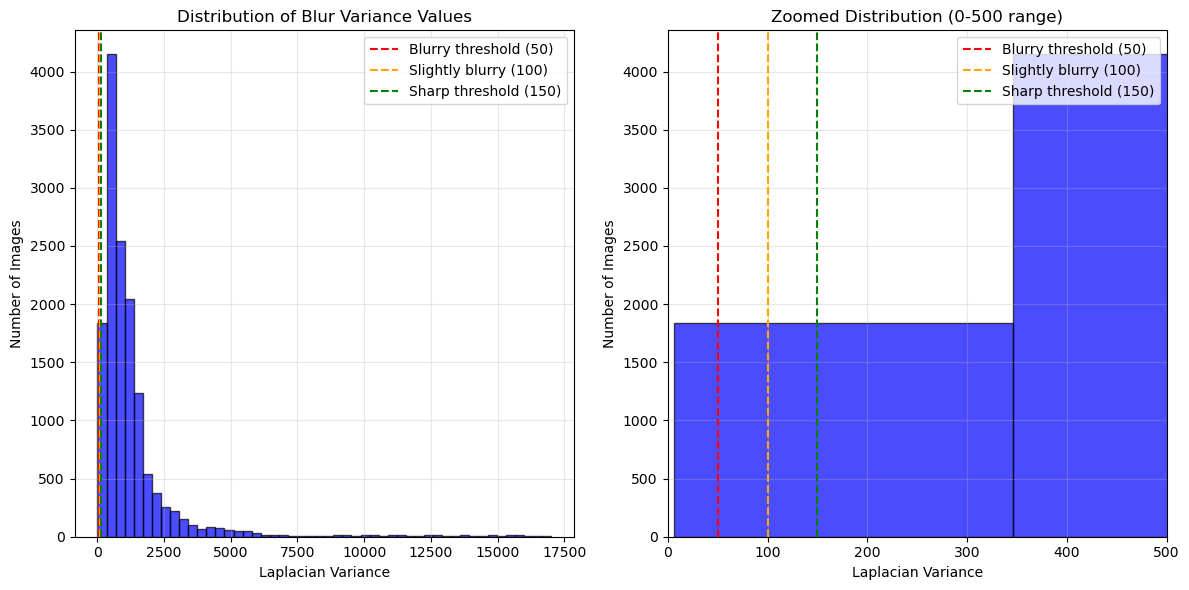

In [14]:
folder_path = r"C:\Users\Access\Documents\data\data\sign_data\images"
print("Starting detailed blur analysis...")
results, variance_values, blur_arrays = detailed_blur_analysis(folder_path)
variances = np.array(variance_values)
plot_variance_histogram(variances)

##  Totals
- **Problematic Exposure/Contrast**: 574 images
- **Problematic Blur**: 252 images  
- **Total Images**: ~14,202

##  Status
**Excellent overall quality** - minor issues affect only ~6% of dataset

In [15]:
severe_underexposed = category_arrays['SEVERE_UNDEREXPOSED']
underexposed = category_arrays['UNDEREXPOSED'] 
very_low_contrast = category_arrays['VERY_LOW_CONTRAST']
low_contrast = category_arrays['LOW_CONTRAST']
print(f"Severe underexposed: {len(severe_underexposed)} images")
print(f"Underexposed: {len(underexposed)} images")
print(f"Very low contrast: {len(very_low_contrast)} images") 
print(f"Low contrast: {len(low_contrast)} images")
print("-" * 40)
sharp_images = blur_arrays['SHARP']
blurry_images = blur_arrays['BLURRY']
very_blurry_images = blur_arrays['VERY_BLURRY']
SLIGHTLY_BLURRY_images=blur_arrays['SLIGHTLY_BLURRY']
print(f"Sharp images: {len(sharp_images)}")
print(f"Blurry images: {len(blurry_images)}")
print(f"Very blurry images: {len(very_blurry_images)}")
print(f"SLIGHTLY_BLURRY_images: {len(SLIGHTLY_BLURRY_images)}")

Severe underexposed: 35 images
Underexposed: 308 images
Very low contrast: 1 images
Low contrast: 230 images
----------------------------------------
Sharp images: 13950
Blurry images: 74
Very blurry images: 15
SLIGHTLY_BLURRY_images: 163
